<h1>Statistical Arbitrage in Cryptocurrencies</h1>
<h3>By: Aditya Pothapragada</h3>

<h3><b>Step 0 - Environment Setup</b></h3>

In [105]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import yfinance as yf

<h3><b>Step 1 - Selecting the Universe of Cryptos</b></h3>
The universe is selected based on high average trading volumes in 2024. I have conducted research on my own and have culminated a portfolio that I believe can be used for this strategy.

In [106]:
univ = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD", "XRP-USD", "DOGE-USD",
    "ADA-USD", "TRX-USD", "LTC-USD", "DOT-USD", "AVAX-USD", "LINK-USD",
    "XLM-USD", "ATOM-USD", "ETC-USD", "FIL-USD", "NEAR-USD",
    "HBAR-USD", "VET-USD", "ICP-USD", "QNT-USD", "SAND-USD", "MANA-USD", "EOS-USD", "AAVE-USD", "THETA-USD",
    "XTZ-USD", "FLOW-USD", "CHZ-USD", "EGLD-USD", "KAVA-USD", "CRV-USD", "RUNE-USD", "1INCH-USD", "ZEC-USD",
    "XMR-USD", "DASH-USD", "KSM-USD", "ENJ-USD", "BAT-USD", "ZIL-USD", "OMG-USD", "NEO-USD", "CELO-USD"]

df = yf.download(univ, start = '2024-01-01', end = '2025-01-01', interval = '1d')

df

/var/folders/kf/d2rjds8n2zn7zl9j9qg9zly00000gn/T/ipykernel_786/3120928867.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(univ, start = '2024-01-01', end = '2025-01-01', interval = '1d')
[*********************100%***********************]  44 of 44 completed


Price          Close                                                        \
Ticker     1INCH-USD    AAVE-USD   ADA-USD   ATOM-USD   AVAX-USD   BAT-USD   
Date                                                                         
2024-01-01  0.488689  116.047493  0.623110  11.197029  41.864464  0.262679   
2024-01-02  0.473744  110.285744  0.605667  10.983018  40.645210  0.266848   
2024-01-03  0.423852  102.590279  0.557286   9.932850  36.795277  0.248227   
2024-01-04  0.456862  104.047234  0.570567  10.264856  38.737835  0.247742   
2024-01-05  0.482745  102.772636  0.541242  10.313005  36.434849  0.236385   
...              ...         ...       ...        ...        ...       ...   
2024-12-27  0.389220  323.264801  0.874768   6.448174  36.480522  0.239302   
2024-12-28  0.412351  353.539520  0.887817   6.602363  37.661846  0.255667   
2024-12-29  0.392218  332.002838  0.858640   6.289591  35.826664  0.237627   
2024-12-30  0.392122  321.680542  0.860017   6.342751  35.906055  0.235728   
2024-12-31  0.382471  308.641388  0.843765   6.185038  35.690929  0.232369   

Price                                                     ...      Volume  \
Ticker         BNB-USD       BTC-USD  CELO-USD   CHZ-USD  ...     SOL-USD   
Date                                                      ...               
2024-01-01  314.408295  44167.332031  0.801390  0.089837  ...  2157671990   
2024-01-02  312.103821  44957.968750  0.811710  0.088348  ...  3782057553   
2024-01-03  316.661285  42848.175781  0.811005  0.080545  ...  5472216595   
2024-01-04  323.600006  44179.921875  0.757400  0.082543  ...  3272723247   
2024-01-05  317.450287  44162.691406  0.705465  0.079584  ...  3022127826   
...                ...           ...       ...       ...  ...         ...   
2024-12-27  690.429382  94164.859375  0.668105  0.085281  ...  2788285851   
2024-12-28  720.959045  95163.929688  0.686781  0.088768  ...  2158687217   
2024-12-29  693.754517  93530.226562  0.657592  0.083833  ...  2165753102   
2024-12-30  704.146301  92643.210938  0.659096  0.084021  ...  3246300054   
2024-12-31  700.986877  93429.203125  0.642283  0.081779  ...  3276526561   

Price                                                                         \
Ticker     THETA-USD     TRX-USD   VET-USD    XLM-USD    XMR-USD     XRP-USD   
Date                                                                           
2024-01-01  25119688   196859913  53676280   60178270   70363491   729315153   
2024-01-02  57041770   284111603  58284864   86906416  127652130  1326197378   
2024-01-03  97256142   414418343  95661379  161549407  139776301  3406740412   
2024-01-04  34491335   279585286  53159221   93818934  156700150  1452005657   
2024-01-05  31486185   273609126  55232330  118917219  142505652  1509144162   
...              ...         ...       ...        ...        ...         ...   
2024-12-27  55281126  1301028136  78284281  305847519   55406164  5426840159   
2024-12-28  44043233   616275035  54187809  195555327   45318865  2759395789   
2024-12-29  55939231   780016564  51068263  175702921   42715590  3053146362   
2024-12-30  64047791   903322164  69606342  336984914   53871785  6671570513   
2024-12-31  47378452   591505441  60939374  325128946   47457662  4725443244   

Price                                      
Ticker       XTZ-USD    ZEC-USD   ZIL-USD  
Date                                       
2024-01-01  47406413   71106557  15887487  
2024-01-02  30368244   65744135  25269179  
2024-01-03  55398158   67193286  84870462  
2024-01-04  32616201   73740723  30158009  
2024-01-05  38931375   66445008  30519840  
...              ...        ...       ...  
2024-12-27  56829969  128490485  29946303  
2024-12-28  49643912  110267623  24151631  
2024-12-29  53156190  115674262  22267417  
2024-12-30  80913336  124372488  32519923  
2024-12-31  65101903  109381966  27620694  

[366 rows x 220 columns]

<h3><b>Step 2 - Preprocessing the Data</b></h3>
I have only taken the <b>Close price</b> (same as Adjusted Close for cryptocurrencies). This is because this is the most vital information that I will be requiring for this strategy. Statistical arbitrage relies heavily on relative price movements, and this can be clearly seen by analyzing the Close prices, as it shows the price at the time of the market closing on a specific day. All NaN values have been removed as part of data cleaning. Also, I have taken the <b>natural logarithm</b> of these prices so that statistical analysis is easier. 

In [107]:
px = df['Close']
px.dropna(axis = 1)
log_price = np.log(px)
log_price

Ticker,1INCH-USD,AAVE-USD,ADA-USD,ATOM-USD,AVAX-USD,BAT-USD,BNB-USD,BTC-USD,CELO-USD,CHZ-USD,...,SOL-USD,THETA-USD,TRX-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD,XTZ-USD,ZEC-USD,ZIL-USD
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,-0.716029,4.754000,-0.473032,2.415648,3.734437,-1.336822,5.750692,10.695741,-0.221408,-2.409758,...,4.696004,0.291561,-2.227366,-3.308527,-2.025673,5.133477,-0.461905,0.096989,3.325993,-3.664772
2024-01-02,-0.747088,4.703075,-0.501425,2.396350,3.704881,-1.321076,5.743336,10.713483,-0.208612,-2.426472,...,4.669189,0.309630,-2.222259,-3.353036,-2.045721,5.122694,-0.469423,0.065088,3.317590,-3.672376
2024-01-03,-0.858371,4.630743,-0.584677,2.295847,3.605369,-1.393412,5.757833,10.665418,-0.209481,-2.518939,...,4.591015,0.167572,-2.236554,-3.438214,-2.115674,5.040688,-0.540289,-0.020795,3.221046,-3.762139
2024-01-04,-0.783374,4.644845,-0.561125,2.328726,3.656817,-1.395367,5.779508,10.696026,-0.277864,-2.494436,...,4.654699,0.193533,-2.234132,-3.417479,-2.106657,5.104013,-0.530644,-0.022626,3.187839,-3.738280
2024-01-05,-0.728267,4.632519,-0.613889,2.333406,3.595526,-1.442293,5.760321,10.695636,-0.348898,-2.530942,...,4.604958,0.140355,-2.258951,-3.470837,-2.127548,5.049242,-0.550804,-0.062551,3.159755,-3.778454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,-0.943611,5.778472,-0.133797,1.863797,3.596778,-1.430029,6.537314,11.452802,-0.403310,-2.461804,...,5.214003,0.774106,-1.351731,-3.087168,-1.051927,5.261058,0.761577,0.291839,4.126783,-3.862376
2024-12-28,-0.885880,5.867995,-0.118990,1.887428,3.628648,-1.363879,6.580582,11.463356,-0.375740,-2.421729,...,5.273069,0.866618,-1.355191,-3.047257,-1.033763,5.282799,0.779703,0.356488,4.134154,-3.813808
2024-12-29,-0.935937,5.805144,-0.152406,1.838896,3.578692,-1.437053,6.542118,11.446040,-0.419171,-2.478929,...,5.245677,0.834201,-1.357567,-3.100249,-1.085011,5.260650,0.738684,0.291554,4.101719,-3.869059


<h3><b>Step 3 - Identifying pairs</b></h3>

First, I found the <b>Pearson correlation matrix</b>, which measures linear relationships between the assets. I then did some cleaning of the correlation matrix, by first unstacking all of the pairs and showing each correlation individually. Then I removed the duplicate pairs (because the correlations will be the same), and all self-correlations by only keeping correlations < 1. Lastly, I only included the pairs that have a correlation <b>greater than 0.7</b> in order to find the pairs which have a relatively higher correlation.

In [108]:
corr_matrix = log_price.corr(method = "pearson")
corr_pairs = corr_matrix.unstack()

# Removing duplicates
i0 = corr_pairs.index.get_level_values(0)
i1 = corr_pairs.index.get_level_values(1)
corr_pairs = corr_pairs[(i0 < i1)]

high_corr_pairs = corr_pairs[corr_pairs > 0.7].sort_values(ascending = False)
high_corr_pairs

Ticker    Ticker   
MANA-USD  SAND-USD     0.984919
BAT-USD   ZIL-USD      0.984066
FLOW-USD  ZIL-USD      0.982640
FIL-USD   FLOW-USD     0.982184
KAVA-USD  OMG-USD      0.979528
                         ...   
CHZ-USD   THETA-USD    0.704286
CELO-USD  CRV-USD      0.702533
ADA-USD   DOGE-USD     0.702490
LINK-USD  XLM-USD      0.702225
RUNE-USD  SAND-USD     0.701236
Length: 471, dtype: float64

This code is used to convert the multi-index series above into a dataframe format for easier data analysis

In [109]:
high_corr_pairs.index = high_corr_pairs.index.set_names(["Asset1", "Asset2"])

high_corr_df = high_corr_pairs.reset_index()
high_corr_df.columns = ["Asset1", "Asset2", "Correlation"]

high_corr_df

,Asset1,Asset2,Correlation
0,MANA-USD,SAND-USD,0.984919
1,BAT-USD,ZIL-USD,0.984066
2,FLOW-USD,ZIL-USD,0.982640
3,FIL-USD,FLOW-USD,0.982184
4,KAVA-USD,OMG-USD,0.979528
...,...,...,...
466,CHZ-USD,THETA-USD,0.704286
467,CELO-USD,CRV-USD,0.702533
468,ADA-USD,DOGE-USD,0.702490
469,LINK-USD,XLM-USD,0.702225


I have used the <b>Augmented Dickey-Fuller</b> test to implement co-integration. Co-integration is helpful to identify whether pairs of assets maintain a stable long-term relationship. This is implemented using the <b>adf_for_pair</b> function. I then applied the function to and calculated the p values and test statistics for all the pairs of assets. I then filtered all the pairs of assets such that only those with a <b>p value less than 0.05</b> are used.

In [110]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test
def adf_for_pair(i, j, px):
    log_px = np.log(px)

    X = log_px[i].fillna(0).values
    Y = log_px[j].fillna(0).values

    model = sm.OLS(Y, sm.add_constant(X)).fit()
    alpha = model.params[0]
    beta = model.params[1]
    residuals = Y - beta * X - alpha

    adf_result = adfuller(residuals)
    p_value = adf_result[1]
    test_statistic = adf_result[0]
    
    return (i, j), (p_value, test_statistic)

results = high_corr_df.apply(lambda row: adf_for_pair(row["Asset1"], row["Asset2"], px), axis=1)
columns = ['asset1', 'asset2', 'p_val', 't_stat']

data = []
for x, y in results:
    asset1 = x[0]
    asset2 = x[1]
    p_val = y[0]
    t_stat = y[1]
    data.append([asset1, asset2, p_val, t_stat])

df_results = pd.DataFrame(data, columns = columns)

valid_pairs = df_results[df_results['p_val'] < 0.05]
valid_pairs = valid_pairs.sort_values('p_val')
valid_pairs

,asset1,asset2,p_val,t_stat
35,EOS-USD,ETC-USD,4.122312e-07,-5.823882
72,DOT-USD,ETC-USD,9.265350e-06,-5.188837
51,ETC-USD,ZIL-USD,1.065734e-05,-5.158946
3,FIL-USD,FLOW-USD,2.380848e-05,-4.984563
4,KAVA-USD,OMG-USD,3.316534e-05,-4.911200
...,...,...,...,...
434,AAVE-USD,XLM-USD,4.703780e-02,-2.885688
13,EOS-USD,SAND-USD,4.919675e-02,-2.868008
394,MANA-USD,RUNE-USD,4.934282e-02,-2.866835
329,CHZ-USD,QNT-USD,4.974904e-02,-2.863588


In [111]:
selected_pairs = list(valid_pairs[['asset1', 'asset2']].itertuples(index=False, name=None))
selected_pairs

[('EOS-USD', 'ETC-USD'),
 ('DOT-USD', 'ETC-USD'),
 ('ETC-USD', 'ZIL-USD'),
 ('FIL-USD', 'FLOW-USD'),
 ('KAVA-USD', 'OMG-USD'),
 ('BAT-USD', 'ZIL-USD'),
 ('AVAX-USD', 'ETC-USD'),
 ('BAT-USD', 'ETC-USD'),
 ('CELO-USD', 'RUNE-USD'),
 ('ETC-USD', 'MANA-USD'),
 ('FIL-USD', 'ZIL-USD'),
 ('ETC-USD', 'SAND-USD'),
 ('AVAX-USD', 'MANA-USD'),
 ('LINK-USD', 'XTZ-USD'),
 ('VET-USD', 'XTZ-USD'),
 ('AVAX-USD', 'BAT-USD'),
 ('ENJ-USD', 'ETC-USD'),
 ('HBAR-USD', 'LTC-USD'),
 ('CHZ-USD', 'ENJ-USD'),
 ('ENJ-USD', 'FLOW-USD'),
 ('ENJ-USD', 'ICP-USD'),
 ('ETC-USD', 'FIL-USD'),
 ('ETC-USD', 'QNT-USD'),
 ('BAT-USD', 'QNT-USD'),
 ('AAVE-USD', 'TRX-USD'),
 ('ADA-USD', 'DASH-USD'),
 ('CHZ-USD', 'KAVA-USD'),
 ('QNT-USD', 'XTZ-USD'),
 ('ETC-USD', 'KSM-USD'),
 ('ICP-USD', 'KAVA-USD'),
 ('CRV-USD', 'XTZ-USD'),
 ('EOS-USD', 'MANA-USD'),
 ('ENJ-USD', 'FIL-USD'),
 ('AVAX-USD', 'DASH-USD'),
 ('FLOW-USD', 'ICP-USD'),
 ('AVAX-USD', 'ZIL-USD'),
 ('SAND-USD', 'XTZ-USD'),
 ('LINK-USD', 'SAND-USD'),
 ('DASH-USD', 'VET-USD'),

<h3><b>Step 4 - Signal Generation</b></h3>
I have defined a function <b>generate_signals</b>. This generates signals based on Z-scores. Z-scores are used because they put all of the spreads on a similar scale. It also shows us how much deviation there is, and sets entry and exit rules that are easily distinguishable.
<p> </p>
The formula for beta is:
$$
\beta_t = \frac{Cov(ln(p_{x, t}), ln(p_{y, t}))}{Var(ln(p_{x, t}))}
$$

The formula for alpha is:
$$
\alpha_t = \mu_{ln(p_{y, t})} - \beta_t * \mu_{ln(p_{x, t})}
$$

The formula for residual at each time stamp is:
$$
\epsilon_t = {ln(p_{y, t})} - (\beta_t * ln(p_{x, t}) + \alpha_t)
$$

The formula for Z-score is:
$$
z_t = \frac{\epsilon_t - \mu_t}{\sigma_t}
$$

In [112]:
def generate_signals(pairs, px):
    signals_df = {}
    for pair in pairs:
        asset1 = pair[0]
        asset2 = pair[1]

        log_px_1 = np.log(px[asset1])
        log_px_2 = np.log(px[asset2])

        covariance = log_px_1.rolling(window = 90, min_periods = 1).cov(log_px_2)
        variance = log_px_1.rolling(window = 90, min_periods = 1).var()

        mean_1 = log_px_1.rolling(window = 90, min_periods = 1).mean()
        mean_2 = log_px_2.rolling(window = 90, min_periods = 1).mean()
        beta = covariance / variance
        alpha = mean_2 - beta * mean_1
        
        spread = log_px_1 - (beta * log_px_2 + alpha)

        mu = spread.rolling(window = 90, min_periods = 1).mean()
        sigma = spread.rolling(window = 90, min_periods = 1).std()

        z_score = (spread - mu) / sigma
        signals_df[(pair), 'z_score'] = z_score
        signals_df[(pair), 'spread'] = spread

    signals_df = pd.DataFrame(signals_df)
    return signals_df

signals_df = generate_signals(selected_pairs, px).dropna()
signals_df.columns = signals_df.columns.set_names(["pair", "field"])
z_df = signals_df.xs("z_score", axis=1, level="field", drop_level=True)
spread_df = signals_df.xs("spread", axis=1, level="field", drop_level=True)
signals_df

pair       (EOS-USD, ETC-USD)           (DOT-USD, ETC-USD)            \
field                 z_score    spread            z_score    spread   
Date                                                                   
2024-01-03           0.707107 -5.905521           0.707107 -1.910184   
2024-01-04           0.908691 -5.701134           0.222113 -1.922031   
2024-01-05           0.993612 -5.554496           1.441305 -1.822547   
2024-01-06           0.890794 -5.519148           1.535713 -1.725540   
2024-01-07           0.797730 -5.507400           1.252229 -1.710419   
...                       ...       ...                ...       ...   
2024-12-27           0.821148 -5.855985           0.459271 -2.307496   
2024-12-28           0.831938 -5.835712           0.565602 -2.292124   
2024-12-29           0.803597 -5.842713           0.536154 -2.296823   
2024-12-30           0.797356 -5.834751           0.413742 -2.315457   
2024-12-31           0.811810 -5.813036           0.448189 -2.310155   

pair       (ETC-USD, ZIL-USD)            (FIL-USD, FLOW-USD)            \
field                 z_score     spread             z_score    spread   
Date                                                                     
2024-01-03           0.707107  12.656834            0.707107  3.550652   
2024-01-04           0.563202  12.598722            0.462188  3.538067   
2024-01-05           0.693742  13.193867            0.613016  3.553241   
2024-01-06           0.719544  13.492086           -1.610081  3.320477   
2024-01-07           1.030754  14.501907           -0.733119  3.397391   
...                       ...        ...                 ...       ...   
2024-12-27           0.232717  15.602745            1.125205  3.841230   
2024-12-28           0.187903  15.575521            1.192816  3.862496   
2024-12-29           0.219380  15.607169            1.181907  3.865301   
2024-12-30           0.206897  15.604976            1.120804  3.856135   
2024-12-31           0.240524  15.638596            1.214958  3.882360   

pair       (KAVA-USD, OMG-USD)            ... (AAVE-USD, XLM-USD)             \
field                  z_score    spread  ...             z_score     spread   
Date                                      ...                                  
2024-01-03            0.707107  0.259453  ...            0.707107  11.775450   
2024-01-04            0.275405  0.202888  ...            0.638080  11.951274   
2024-01-05            0.260796  0.204196  ...            0.719742  12.313821   
2024-01-06            0.422423  0.221828  ...            0.159840  11.591383   
2024-01-07            0.677718  0.247949  ...           -0.005079  11.401223   
...                        ...       ...  ...                 ...        ...   
2024-12-27            0.554679  0.602125  ...            0.732610  18.328517   
2024-12-28            0.803829  0.622421  ...            0.699494  18.209950   
2024-12-29            1.356085  0.667768  ...            0.667075  18.093590   
2024-12-30            0.853587  0.629605  ...            0.634582  17.974775   
2024-12-31            0.863705  0.631862  ...            0.600598  17.843857   

pair       (EOS-USD, SAND-USD)           (MANA-USD, RUNE-USD)            \
field                  z_score    spread              z_score    spread   
Date                                                                      
2024-01-03           -0.707107  0.828675            -0.707107 -2.850745   
2024-01-04           -1.139143  0.725079            -0.573251 -2.816546   
2024-01-05           -0.743902  0.738925            -0.538676 -3.046646   
2024-01-06           -0.248852  0.768673            -0.572727 -3.469586   
2024-01-07            0.455001  0.810013            -0.656782 -4.043337   
...                        ...       ...                  ...       ...   
2024-12-27           -0.934267  0.907541             1.132901 -3.034149   
2024-12-28           -1.043685  0.877325             1.131890 -3.000372   
2024-12-

<h3><b>Step 5 - Trading Strategy Implementation</b></h3>
The <b>generate_positions</b> function is used to implement the trading strategy I have developed. I have used an entry threshold of 2 and an exit threshold of 0.45. <b>current_position</b> is used to determine what position to take at what time period. If current_position is zero, and Z-score is greater than 2, then <b>short spread</b> (current_position = -1). If the Z-score is less than -2, then <b>long spread</b> (current_position = 1). If the current_position is 1 or -1, and the value of the Z-score is between -0.45 and 0.45, then you <b>exit the long or short spread</b> by changing the current_position to 0. I created a df to visualize the result of implementing my strategy.

In [113]:
def generate_positions(z_scores, entry_threshold = 2, exit_threshold = 0.45):
    positions = []
    current_position = 0
    for z in z_scores:
        if current_position == 0:
            if z > entry_threshold:
                current_position = -1
            elif z < -entry_threshold:
                current_position = 1
        elif current_position == 1 and abs(z) < exit_threshold:
            current_position = 0
        elif current_position == -1 and abs(z) < exit_threshold:
            current_position = 0
    
        positions.append(current_position)

    return pd.Series(positions, index = z_scores.index)

positions_df = z_df.apply(generate_positions, axis = 0)
positions_df

pair,"(EOS-USD, ETC-USD)","(DOT-USD, ETC-USD)","(ETC-USD, ZIL-USD)","(FIL-USD, FLOW-USD)","(KAVA-USD, OMG-USD)","(BAT-USD, ZIL-USD)","(AVAX-USD, ETC-USD)","(BAT-USD, ETC-USD)","(CELO-USD, RUNE-USD)","(ETC-USD, MANA-USD)",...,"(HBAR-USD, LINK-USD)","(ICP-USD, MANA-USD)","(FIL-USD, OMG-USD)","(FIL-USD, MANA-USD)","(DOT-USD, EOS-USD)","(AAVE-USD, XLM-USD)","(EOS-USD, SAND-USD)","(MANA-USD, RUNE-USD)","(CHZ-USD, QNT-USD)","(ATOM-USD, CHZ-USD)"
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-01-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-01-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,0,0,0,-1,0,0,-1,0,0,0,...,-1,-1,0,0,0,-1,1,0,1,0
2024-12-28,0,0,0,-1,0,0,-1,0,0,0,...,-1,-1,0,0,0,-1,1,0,1,0
2024-12-29,0,0,0,-1,0,0,-1,0,0,0,...,-1,-1,0,0,0,-1,1,0,1,0


<h3><b>Step 6 - Backtesting</b></h3>

I calculated several performance metrics that I believe can be used to analyze how reliable this strategy is. First, I calculated spread returns, and then aligned the positions by shifting and reindexing. Then, I calculated the pnl and took the mean of the pnl to find the portfolio returns. The three performance metrics I used were drawdown, cumulative returns, and sharpe ratio, which I calculated using the formula:

$
\textrm{Sharpe} = \frac{\textrm{Average return}}{\textrm{Volatility}} * \sqrt{252}
$



In [114]:
# Spread returns
spread_rets = spread_df.pct_change().dropna()

# Align positions
aligned_positions = positions_df.shift(1).reindex(spread_rets.index)
aligned_positions

# PnL
pnl = aligned_positions * spread_rets
pnl

# Portfolio returns
port_rets = pnl.mean(axis = 1)
port_rets

# Cumulative returns
cum_rets = (1 + port_rets).cumprod()
cum_rets

# Sharpe ratio
sharpe = np.sqrt(252) * port_rets.mean() / port_rets.std()
sharpe

# Max Drawdown
cum_max = cum_rets.cummax()
drawdown = (cum_rets - cum_max) / cum_max
max_dd = drawdown.min()

In [115]:
print("The sharpe ratio of this strategy is " + str(round(sharpe, 3)) + ".")

The sharpe ratio of this strategy is 0.908.


Text(0.5, 1.0, 'Cumulative returns of Strategy in 2024')

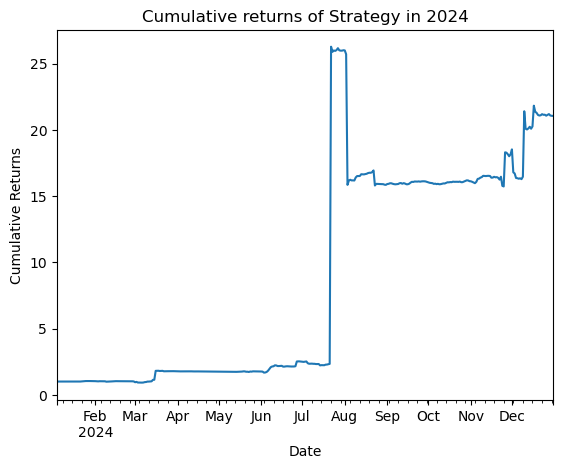

In [116]:
cum_rets.plot()
plt.ylabel("Cumulative Returns")
plt.title("Cumulative returns of Strategy in 2024")

Text(0.5, 1.0, 'Drawdown of strategy in 2024')

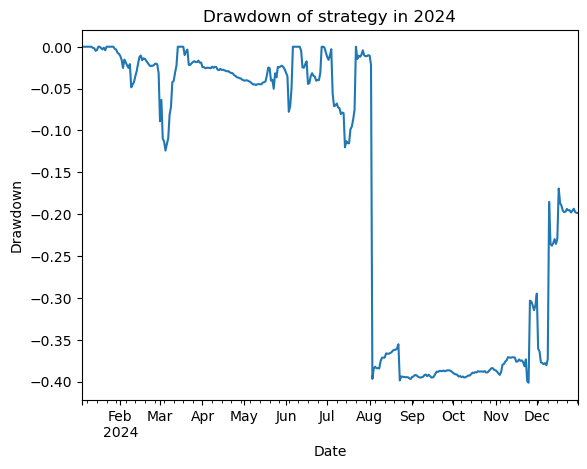

In [117]:
drawdown.plot()
plt.ylabel("Drawdown")
plt.title("Drawdown of strategy in 2024")